# E-Commerce Shipping Analysis

In the world of e-commerce, efficient shipping is a crucial factor that can make or break a customer's online shopping experience. With the exponential growth of online retail, understanding and utilizing e-commerce shipping data has become essential for businesses to stay competitive in the market.

E-commerce shipping data refers to the information generated during the shipping process of online orders. By analyzing this data, businesses can gain valuable insights into their shipping operations and make informed decisions to optimize their processes, reduce costs, and enhance customer satisfaction.

# Import Python Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy.stats import f_oneway

#https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb
import dtreeviz
from yellowbrick.model_selection import FeatureImportances

import matplotlib.pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport
import missingno as msno

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.naive_bayes import GaussianNB, MultinomialNB

from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
# pip install dtreeviz

In [3]:
# pip install yellowbrick

In [4]:
# pip install ydata-profiling

In [5]:
# pip install missingno

In [6]:
df = pd.read_csv('Train.csv')
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [7]:

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
df.tail()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  \
10994  10995               A             Ship                    4   
10995  10996               B             Ship                    4   
10996  10997               C             Ship                    5   
10997  10998               F             Ship                    5   
10998  10999               D             Ship                    2   

       Customer_rating  Cost_of_the_Product  Prior_purchases  \
10994                1                  252                5   
10995                1                  232                5   
10996                4                  242                5   
10997                2                  223                6   
10998                5                  155                5   

      Product_importance Gender  Discount_offered  Weight_in_gms  \
10994             medium      F                 1           1538   
10995             medium      F                 6           1247   
10996                low      F                 4           1155   
10997             medium      M                 2           1210   
10998                low      F                 6           1639   

       Reached.on.Time_Y.N  
10994                    1  
10995                    0  
10996                    0  
10997                    0  
10998                    0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


There are no missing values


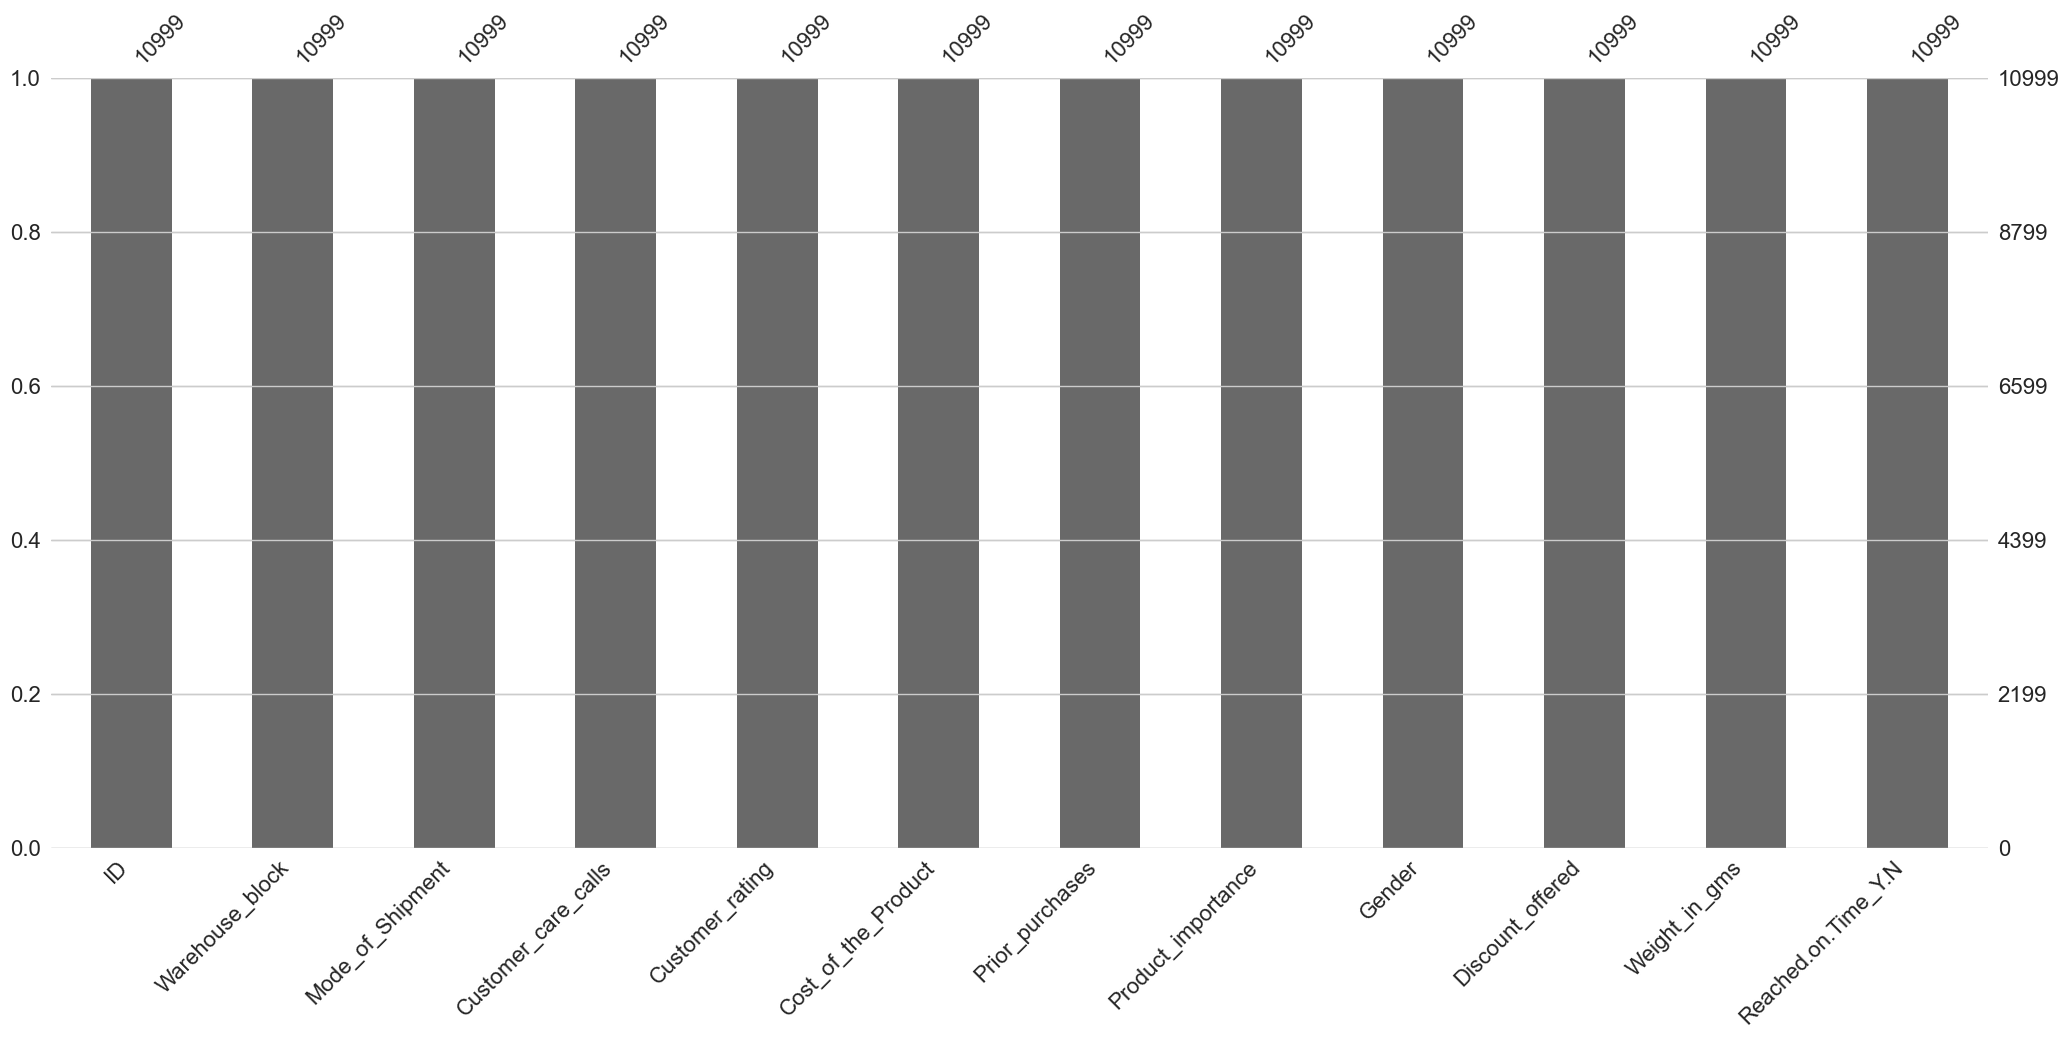

In [10]:
print('There are no missing values')
ax = msno.bar(df)

In [11]:
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [12]:
print('Total number of observations:', df.shape[0])
before_drop = df.shape[1]
print('Total number of attributes before dropping:', before_drop)

Total number of observations: 10999
Total number of attributes before dropping: 12


In [13]:
print('Columns before dropping:\n\n',df.columns)

Columns before dropping:

 Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [14]:
# Removing ID column
df.drop(['ID'], axis=1, inplace=True) 

In [15]:
print('Columns after dropping:\n\n', df.columns)

Columns after dropping:

 Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [16]:
print('Total number of attributes before dropping:', before_drop)
print('Total number of attributes after dropping:', df.shape[1])

Total number of attributes before dropping: 12
Total number of attributes after dropping: 11


In [17]:
df.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [18]:
# if the number of unique values is less than 20 then the variable is likely to be categorical otherwise continuous.
df.nunique()

Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64

In [19]:
# Removing duplicate rows if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 1.0+ MB


# Defining the problem statement:
Create a Predictive model which can tell whether a product will reach or not on time

    Target Variable: Reached.on.Time_Y.N
    Predictors: 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls'... etc.

    Reached on time=0 means the product arrived ON TIME
    Reached on time=1 means the product was NOT arrived ON TIME.
    
## Determining the type of Machine Learning

Based on the problem statement you can understand that we need to create a supervised ML Regression model, as the target variable is Continuous.

## Looking at the distribution of Target variable

    If target variable's distribution is too skewed then the predictive modeling will not be possible.
    Bell curve is desirable but slightly positive skew or negative skew is also fine
    When performing Regression, make sure the histogram looks like a bell curve or slight skewed version of it. Otherwise it impacts the Machine Learning algorithms ability to learn all the scenarios.

<AxesSubplot:title={'center':'Product On Time Vs Product Not On Time'}, xlabel='Reached.on.Time_Y.N'>

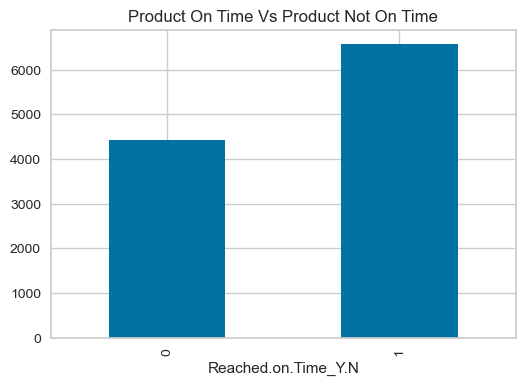

In [20]:
# Creating Bar chart as the Target variable is Categorical
GroupedData = df.groupby('Reached.on.Time_Y.N').size()
GroupedData.plot(kind='bar', figsize=(6,4),title='Product On Time Vs Product Not On Time')

The Target variable distribution looks balanced. There are enough number of rows for Clicked=0 as well Clicked=1 for the ML algorithms to learn. Hence we can go ahead!

## Visual Exploratory Data Analysis

    Categorical variables: Bar plot
    Continuous variables: Histogram

In [21]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

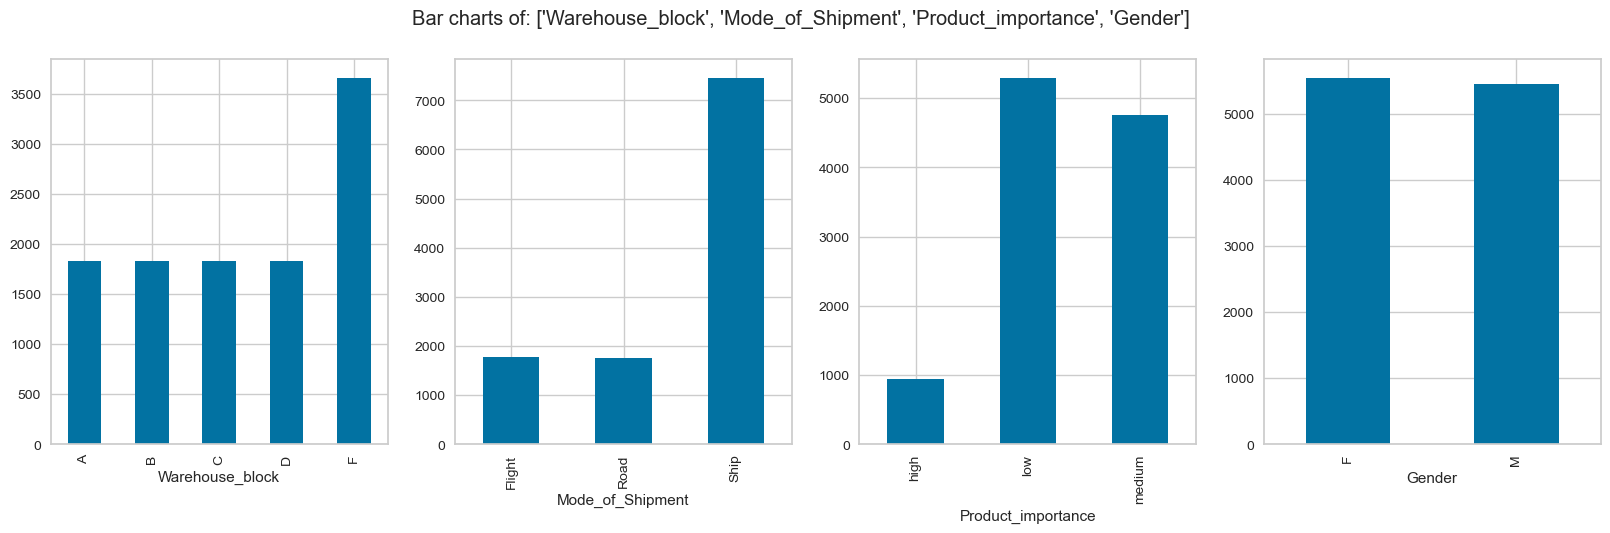

In [22]:
# Calling the function
PlotBarCharts(inpData=df, colsToPlot=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender'])

## Visualize distribution of all the Continuous Predictor variables in the data using histograms

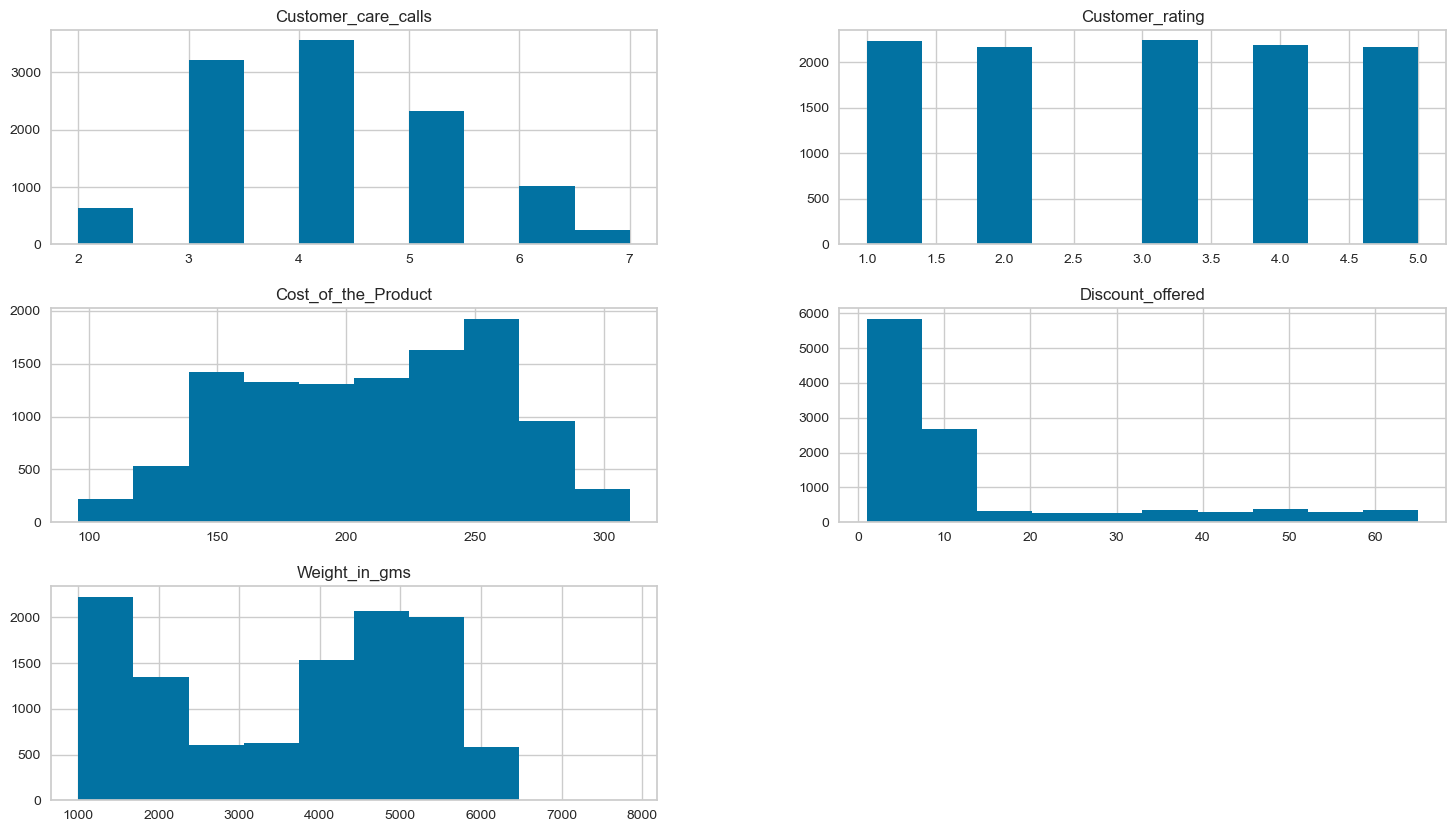

In [23]:
# Plotting histograms of multiple columns together
df.hist(['Customer_care_calls','Customer_rating','Cost_of_the_Product',
         'Discount_offered','Weight_in_gms'], figsize=(18,10));

## Relationship exploration: Continuous Vs Continuous -- Box Plots

When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

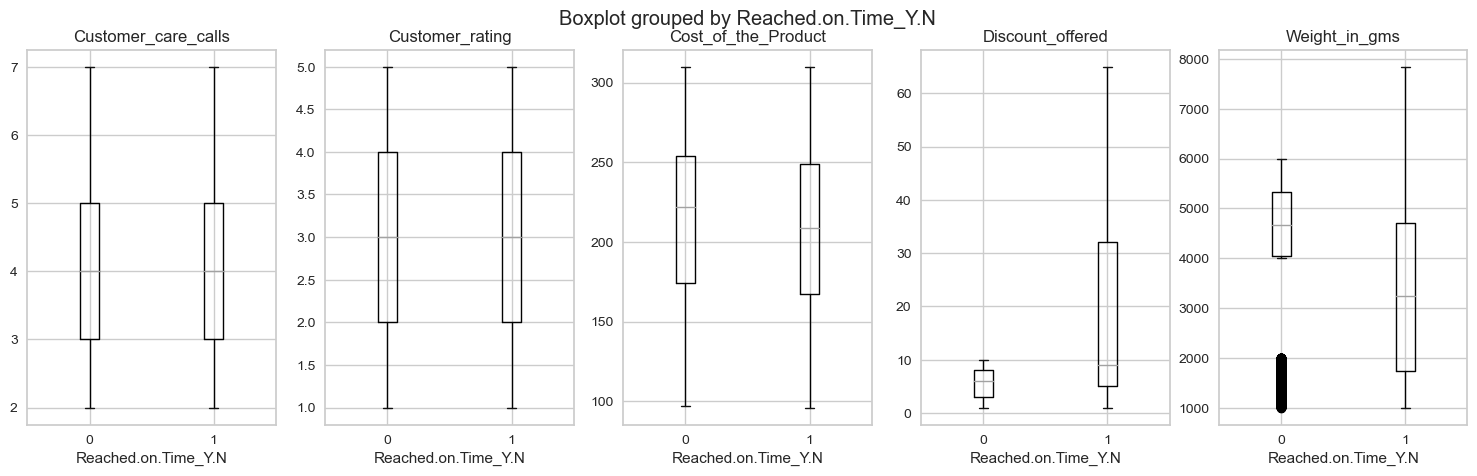

In [24]:
# Box plots for Categorical Target Variable "Clicked" and continuous predictors
ContinuousColsList = ['Customer_care_calls','Customer_rating','Cost_of_the_Product',
         'Discount_offered','Weight_in_gms']

fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))

# Creating box plots for each continuous predictor against the Target Variable "Clicked"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    df.boxplot(column=PredictorCol, by='Reached.on.Time_Y.N', figsize=(5,5), vert=True, ax=PlotCanvas[i])

## Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test

Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

    Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)
    ANOVA Test result: Probability of H0 being true

In [25]:
# Defining a function to find the statistical relationship with all the categorical variables

def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is < 0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [26]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Customer_care_calls','Customer_rating','Cost_of_the_Product',
         'Discount_offered','Weight_in_gms']
FunctionAnova(inpData=df, TargetVariable='Reached.on.Time_Y.N', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Customer_care_calls is correlated with Reached.on.Time_Y.N | P-Value: 1.8275351786055617e-12
Customer_rating is NOT correlated with Reached.on.Time_Y.N | P-Value: 0.1689048972233232
Cost_of_the_Product is correlated with Reached.on.Time_Y.N | P-Value: 1.0998859726112273e-14
Discount_offered is correlated with Reached.on.Time_Y.N | P-Value: 0.0
Weight_in_gms is correlated with Reached.on.Time_Y.N | P-Value: 2.354658280269284e-181


['Customer_care_calls',
 'Cost_of_the_Product',
 'Discount_offered',
 'Weight_in_gms']

The results of ANOVA confirm our visual analysis using box plots above.

All Four columns are correlated with Reached.on.Time_Y.N (Target Variable).

## Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts

When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

In [27]:
# Cross tablulation between two categorical variables
CrossTabResult=pd.crosstab(index=df['Gender'], columns=df['Reached.on.Time_Y.N'])
CrossTabResult

Reached.on.Time_Y.N     0     1
Gender                         
F                    2249  3296
M                    2187  3267

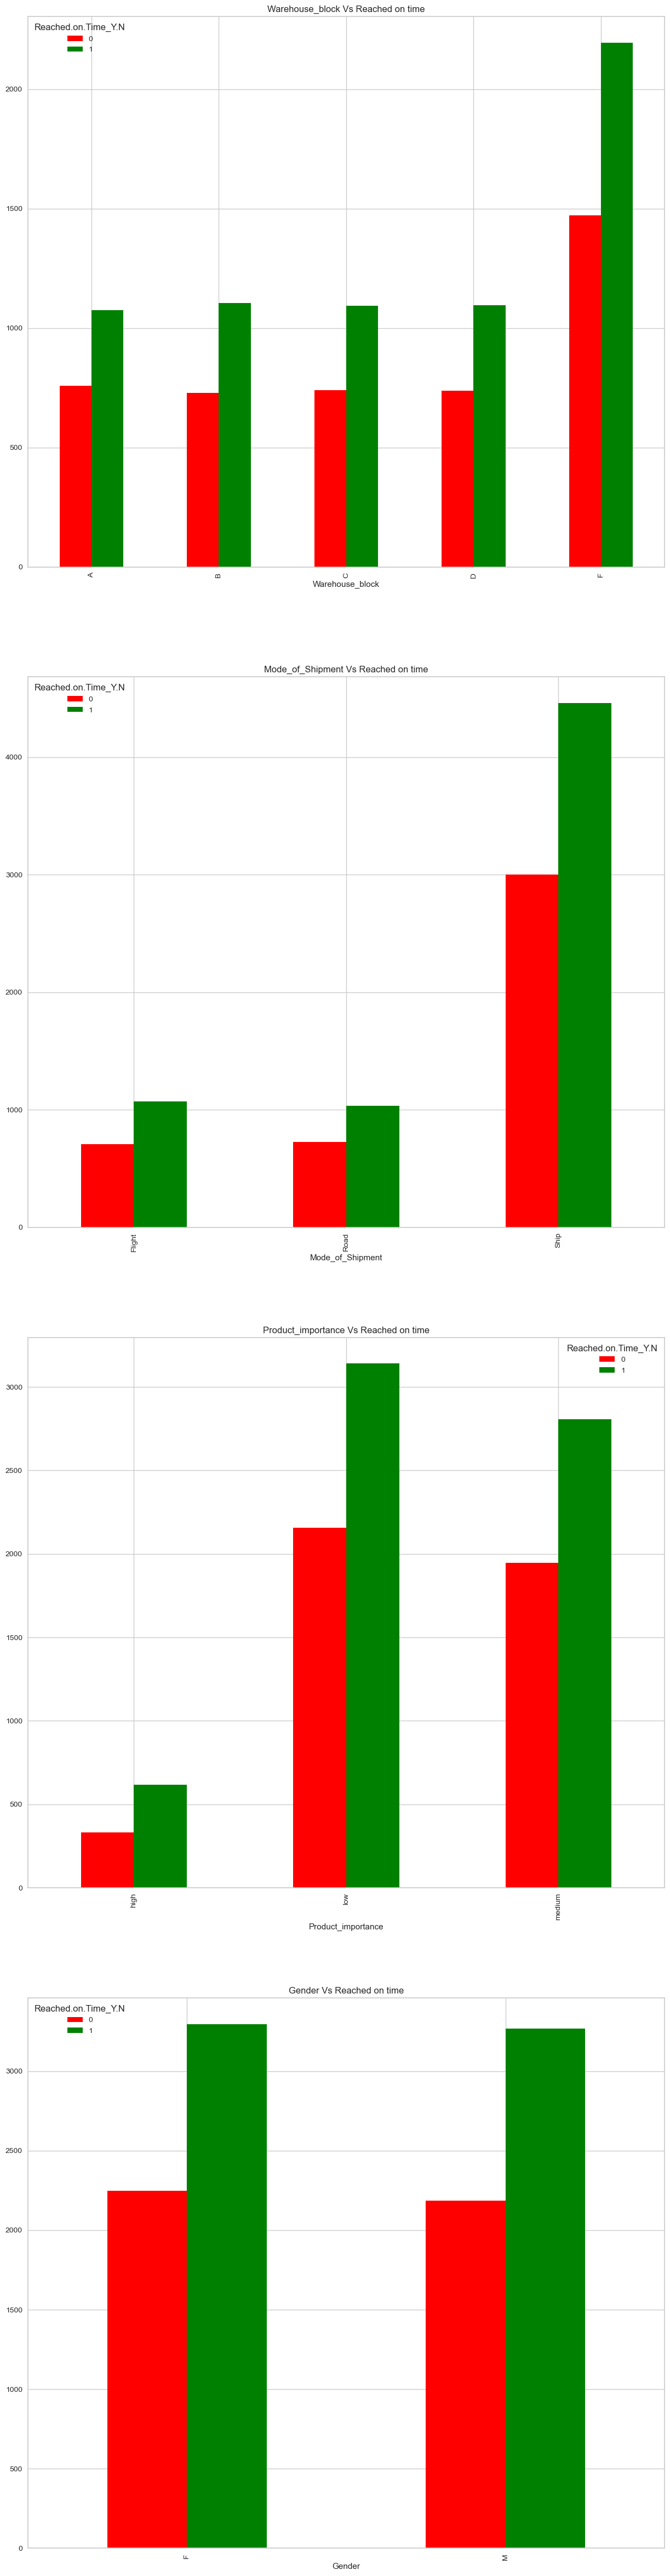

In [28]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(15,60))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=df[CategoricalCol], columns=df['Reached.on.Time_Y.N'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs Reached on time')

Grouped Bar charts Interpretation
What to look for in these grouped bar charts?

These grouped bar charts show the frequency in the Y-Axis and the category in the X-Axis. If the ratio of bars is similar across all categories, then the two columns are not correlated.

We confirm this analysis in below section by using Chi-Square Tests.

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

    Assumption(H0): The two columns are NOT related to each other
    Result of Chi-Sq Test: The Probability of H0 being True
    More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [29]:
# Writing a function to find the correlation of all categorical variables with the Target variable

def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is < 0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [30]:
CategoricalVariables=['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']

# Calling the function
FunctionChisq(inpData=df, 
              TargetVariable='Reached.on.Time_Y.N',
              CategoricalVariablesList= CategoricalVariables)

Warehouse_block is NOT correlated with Reached.on.Time_Y.N | P-Value: 0.8959524278243698
Mode_of_Shipment is NOT correlated with Reached.on.Time_Y.N | P-Value: 0.6895487627593786
Product_importance is correlated with Reached.on.Time_Y.N | P-Value: 0.002230383104745087
Gender is NOT correlated with Reached.on.Time_Y.N | P-Value: 0.6367032124181522


['Product_importance']


# Selecting final predictors for Machine Learning

Based on the above tests, selecting the final columns for machine learning

In [31]:
SelectedColumns = ['Customer_care_calls', 'Cost_of_the_Product','Discount_offered', 
                   'Weight_in_gms','Product_importance']
# Selecting final columns
DataForML = df[SelectedColumns]
DataForML.head()

Customer_care_calls  Cost_of_the_Product  Discount_offered  Weight_in_gms  \
0                    4                  177                44           1233   
1                    4                  216                59           3088   
2                    2                  183                48           3374   
3                    3                  176                10           1177   
4                    2                  184                46           2484   

  Product_importance  
0                low  
1                low  
2                low  
3             medium  
4             medium

## Data Pre-processing for Machine Learning

List of steps performed on predictor variables before data can be used for machine learning

    Converting each Ordinal Categorical columns to numeric
    Converting Binary nominal Categorical columns to numeric using 1/0 mapping
    Converting all other nominal categorical columns to numeric using pd.get_dummies()
    Data Transformation (Optional): Standardization/Normalization/log/sqrt. Important if you are using distance based algorithms like KNN, or Neural Networks

In this data there is no Ordinal categorical variable which is in string format.
## Converting the binary nominal variable to numeric using 1/0 mapping

In [32]:
# Convert 'Product_importance' using get_dummies()
DataForML_Numeric = pd.get_dummies(df, columns=['Product_importance'])

# Print the updated DataFrame
DataForML_Numeric.head()

Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0               D           Flight                    4                2   
1               F           Flight                    4                5   
2               A           Flight                    2                2   
3               B           Flight                    3                3   
4               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Gender  Discount_offered  \
0                  177                3      F                44   
1                  216                2      M                59   
2                  183                4      M                48   
3                  176                4      M                10   
4                  184                3      F                46   

   Weight_in_gms  Reached.on.Time_Y.N  Product_importance_high  \
0           1233                    1                        0   
1           3088                    1                        0   
2           3374                    1                        0   
3           1177                    1                        0   
4           2484                    1                        0   

   Product_importance_low  Product_importance_medium  
0                       1                          0  
1                       1                          0  
2                       1                          0  
3                       0                          1  
4                       0                          1

In [33]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases', 'Gender',
       'Discount_offered', 'Weight_in_gms', 'Reached.on.Time_Y.N',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

In [34]:
# Separate Target Variable and Predictor Variables
TargetVariable = 'Reached.on.Time_Y.N'
Predictors = ['Customer_care_calls', 'Cost_of_the_Product','Discount_offered', 
              'Weight_in_gms','Product_importance_high', 'Product_importance_low',
              'Product_importance_medium']
print(TargetVariable, Predictors)

Reached.on.Time_Y.N ['Customer_care_calls', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms', 'Product_importance_high', 'Product_importance_low', 'Product_importance_medium']


In [35]:
X = DataForML_Numeric[Predictors]
y = DataForML_Numeric[TargetVariable]

print(X,y)

       Customer_care_calls  Cost_of_the_Product  Discount_offered  \
0                        4                  177                44   
1                        4                  216                59   
2                        2                  183                48   
3                        3                  176                10   
4                        2                  184                46   
...                    ...                  ...               ...   
10994                    4                  252                 1   
10995                    4                  232                 6   
10996                    5                  242                 4   
10997                    5                  223                 2   
10998                    2                  155                 6   

       Weight_in_gms  Product_importance_high  Product_importance_low  \
0               1233                        0                       1   
1               3088     

In [36]:
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standardization/Normalization of data

You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data.

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [37]:
# select the continuous numerical variables
cont_num_var = ['Customer_care_calls', 'Cost_of_the_Product','Discount_offered', 
              'Weight_in_gms']

# Instantiate the MinMaxScaler 
scaler = MinMaxScaler()

# Normalize the continuous numerical variables
X_train[cont_num_var] = scaler.fit_transform(X_train[cont_num_var])

X_test[cont_num_var] = scaler.transform(X_test[cont_num_var])

In [38]:
print(X_train.head())
print(X_train.describe())

      Customer_care_calls  Cost_of_the_Product  Discount_offered  \
9957                  1.0             0.869159          0.078125   
1507                  0.4             0.182243          0.984375   
6382                  0.4             0.551402          0.140625   
1559                  0.2             0.350467          0.000000   
5703                  0.6             0.710280          0.046875   

      Weight_in_gms  Product_importance_high  Product_importance_low  \
9957       0.116728                        0                       1   
1507       0.068663                        0                       0   
6382       0.503433                        0                       1   
1559       0.091746                        0                       1   
5703       0.669978                        0                       1   

      Product_importance_medium  
9957                          0  
1507                          1  
6382                          0  
1559                  

In [39]:
df['Cost_of_the_Product'].mean()

210.19683607600692

In [40]:
print(X_test.head())
print(X_test.describe())

      Customer_care_calls  Cost_of_the_Product  Discount_offered  \
107                   0.4             0.560748          0.390625   
5594                  0.2             0.579439          0.078125   
6997                  0.2             0.556075          0.031250   
3984                  0.6             0.299065          0.000000   
3111                  0.6             0.621495          0.671875   

      Weight_in_gms  Product_importance_high  Product_importance_low  \
107        0.153689                        1                       0   
5594       0.667787                        0                       1   
6997       0.444266                        0                       1   
3984       0.536304                        0                       1   
3111       0.207159                        0                       0   

      Product_importance_medium  
107                           0  
5594                          0  
6997                          0  
3984                  

# Logistic Regression

In [76]:
# Logistic Regression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')

# Printing all the parameters of logistic regression
print(clf)

LogisticRegression(C=1, solver='newton-cg')


In [77]:
# Creating the model on Training Data
LOG = clf.fit(X_train,y_train)
prediction = LOG.predict(X_test)

In [78]:
# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.54      0.57      0.56      1312
           1       0.71      0.68      0.69      1988

    accuracy                           0.64      3300
   macro avg       0.62      0.63      0.62      3300
weighted avg       0.64      0.64      0.64      3300



In [79]:
print('LOG Test Score:',LOG.score(X_test,y_test))

LOG Test Score: 0.636969696969697


## Confusion Matrix

In [80]:
LOG.classes_

array([0, 1], dtype=int64)

In [81]:
mapping = {0:'On Time', 1:'Delayed'}
classesMapped = [mapping.get(value, value) for value in clf.classes_]
classesMapped

['On Time', 'Delayed']

In [82]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[ 750  562]
 [ 636 1352]]


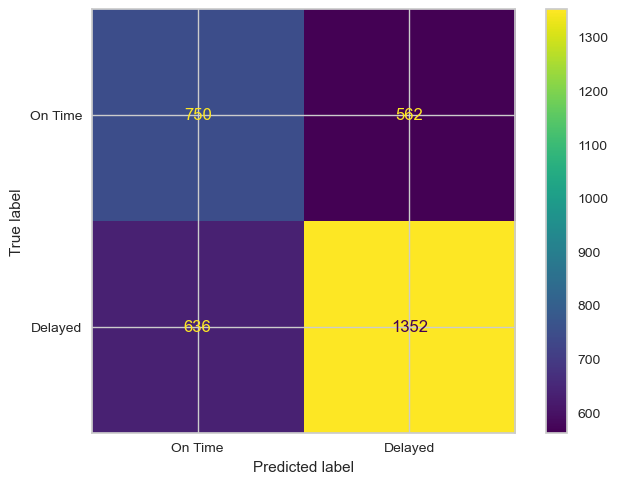

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesMapped)

disp.plot()
plt.show()

In [84]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.64


In [85]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.78133391 0.78740402 0.782538   0.77802768 0.69786535 0.37922985
 0.43191485 0.47799724 0.4849929  0.46311192]

Final Average Accuracy of the model: 0.61


In [87]:
# 'LogisticRegression' object has no attribute 'feature_importances_'

# Decision Tree

In [51]:
#Decision Trees
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=2,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

DecisionTreeClassifier(criterion='entropy', max_depth=2)


In [52]:
# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.58      0.74      0.65      1312
           1       0.79      0.64      0.71      1988

    accuracy                           0.68      3300
   macro avg       0.68      0.69      0.68      3300
weighted avg       0.70      0.68      0.68      3300



In [53]:
print('DT Test Score:',DTree.score(X_test,y_test))

DT Test Score: 0.6796969696969697


## Confusion Matrix

In [54]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[ 970  342]
 [ 715 1273]]


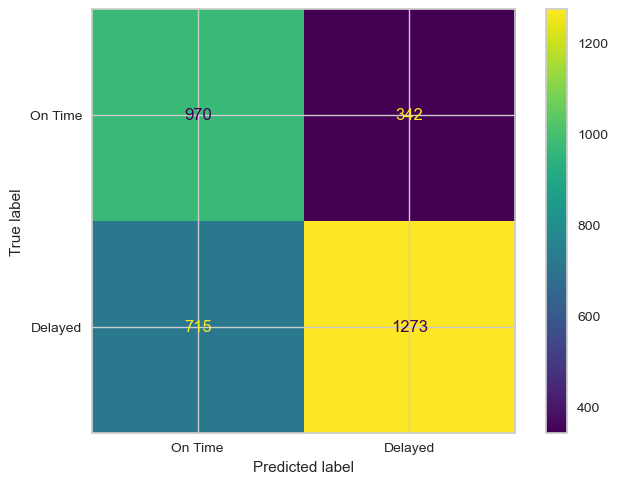

In [55]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesMapped)

disp.plot()
plt.show()

In [56]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.68


## Plot Feature Importance

<AxesSubplot:title={'center':'Feature Importances'}>

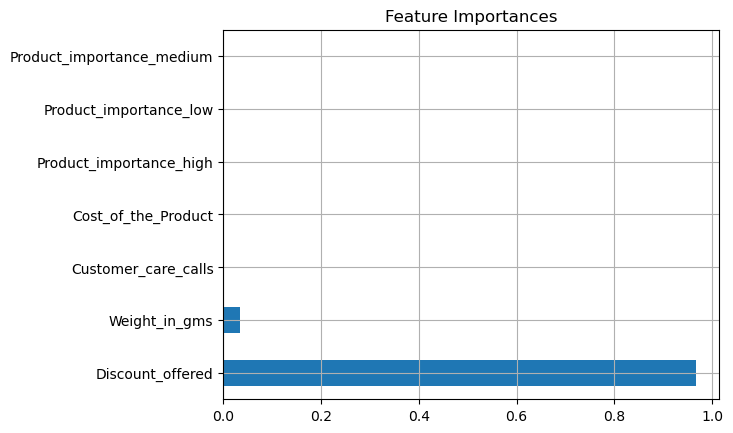

In [104]:
# Plotting the feature importance for important columns
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh', title = 'Feature Importances', grid=True)

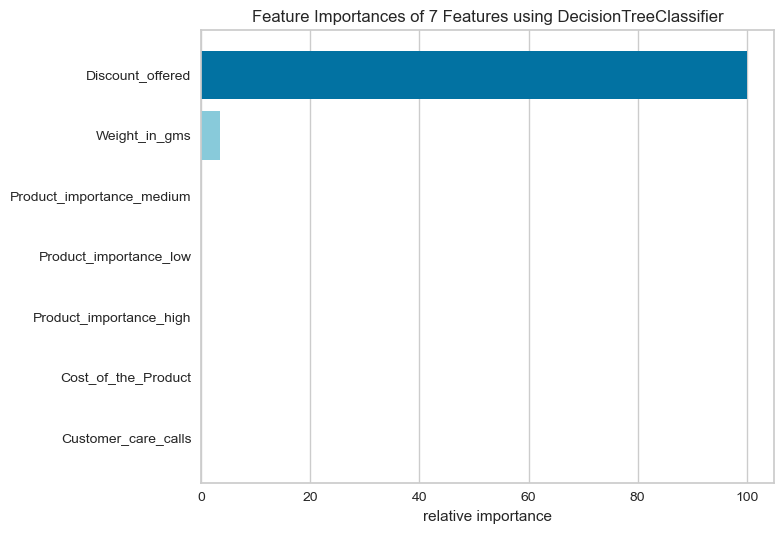

In [110]:
viz = FeatureImportances(clf, labels=X.columns)
viz.fit(X_train, y_train)
viz.show();

In [115]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.96242548 0.96145947 0.90942868 0.8699823  0.76112111 0.30660454
 0.42740051 0.48972814 0.50218102 0.43463307]

Final Average Accuracy of the model: 0.66


# Random Forest

In [245]:
# Random Forest (Bagging of multiple Decision Trees)
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

RandomForestClassifier(max_depth=2)


In [246]:
# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

In [247]:
# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.57      0.75      0.65      1312
           1       0.79      0.63      0.70      1988

    accuracy                           0.68      3300
   macro avg       0.68      0.69      0.68      3300
weighted avg       0.71      0.68      0.68      3300



In [251]:
print('RF Test Score:',RF.score(X_test,y_test))

RF Test Score: 0.6784848484848485


## Confusion Matrix

In [122]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[1014  298]
 [ 761 1227]]


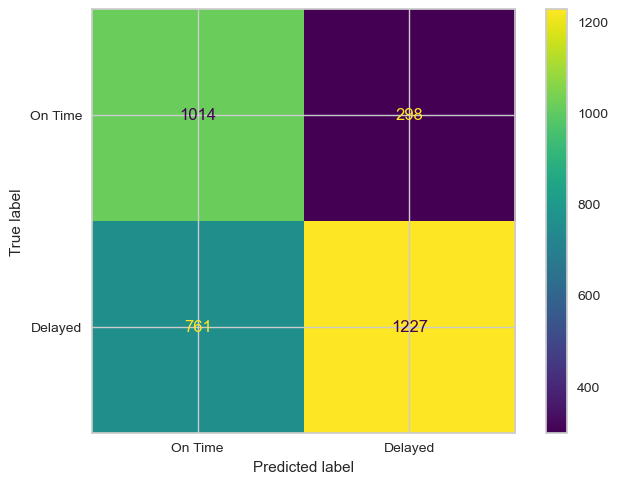

In [123]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesMapped)

disp.plot()
plt.show()

In [124]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.68


In [125]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.55007002 0.61595389 0.65110126 0.59324949 0.75544645 0.26411855
 0.40888512 0.46962737 0.48216049 0.42605569]

Final Average Accuracy of the model: 0.52


## Feature Importances

<AxesSubplot:title={'center':'Feature Importances'}>

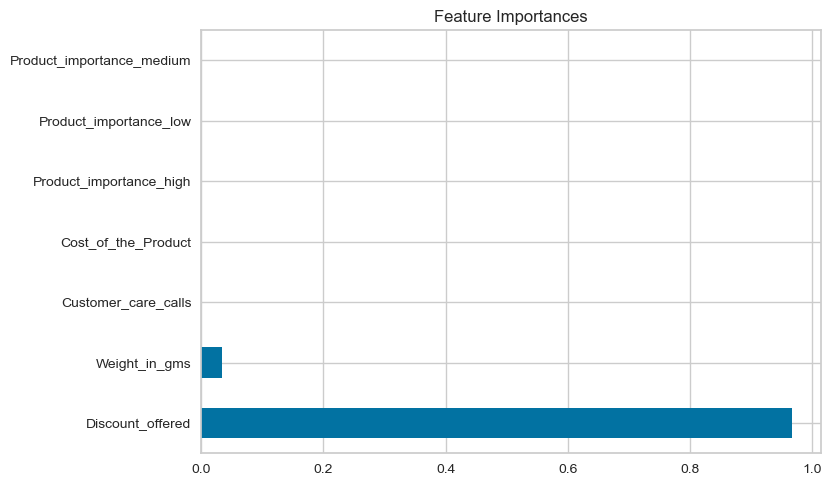

In [126]:
# Plotting the feature importance for important columns
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh', title = 'Feature Importances', grid=True)

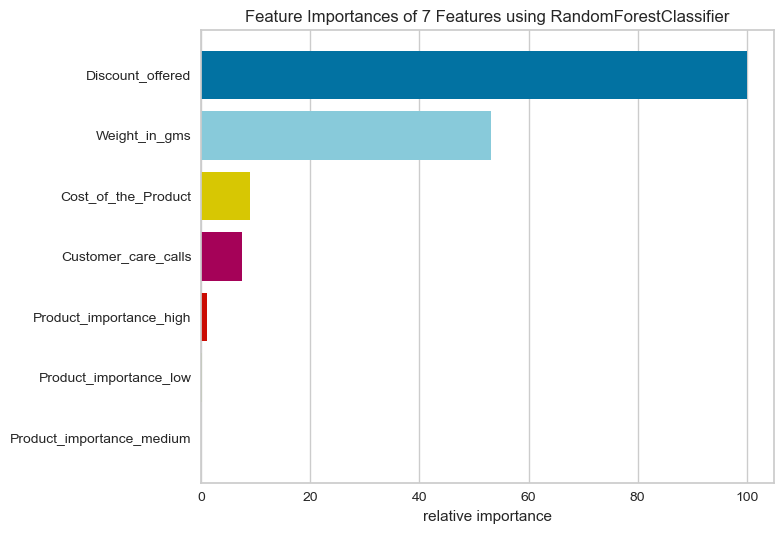

In [127]:
viz = FeatureImportances(clf, labels=X.columns)
viz.fit(X_train, y_train)
viz.show();

## Plotting one of the Decision Trees in the Random Forest

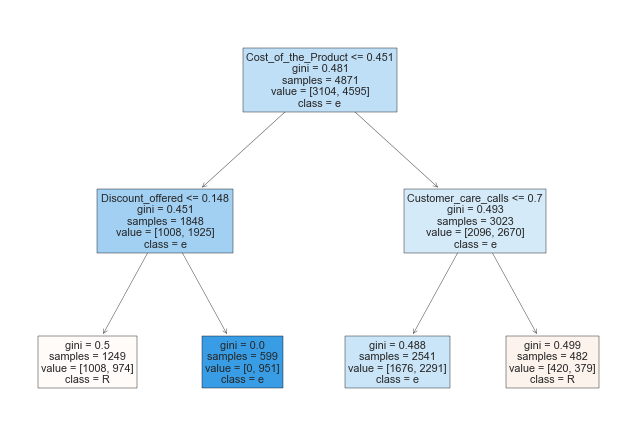

In [128]:
tree.plot_tree(clf.estimators_[4], filled=True,feature_names=Predictors, class_names=TargetVariable);

# AdaBoost

In [252]:
# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=1)
clf = AdaBoostClassifier(n_estimators=500, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=500)


In [253]:
# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.57      0.79      0.66      1312
           1       0.81      0.61      0.69      1988

    accuracy                           0.68      3300
   macro avg       0.69      0.70      0.68      3300
weighted avg       0.71      0.68      0.68      3300



In [254]:
print('AB Test Score:',AB.score(X_test,y_test))

AB Test Score: 0.6775757575757576


## Confusion Matrix

In [131]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[1030  282]
 [ 782 1206]]


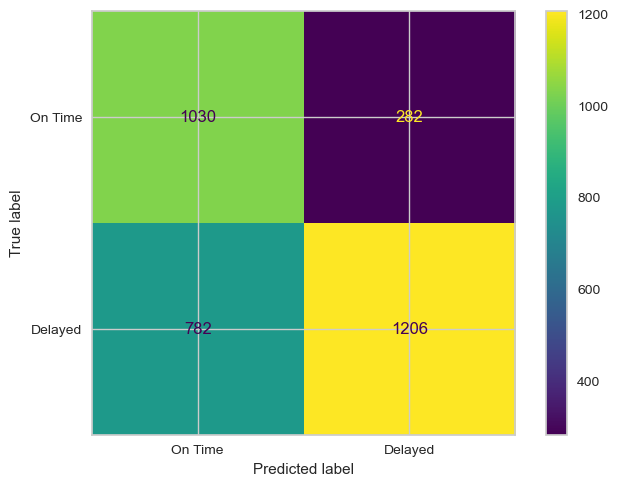

In [132]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesMapped)

disp.plot()
plt.show()

In [133]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.68


In [134]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.96242548 0.96145947 0.9065225  0.8699823  0.76112111 0.26121922
 0.379093   0.4730385  0.46260102 0.41391233]

Final Average Accuracy of the model: 0.65


## Feature Importances

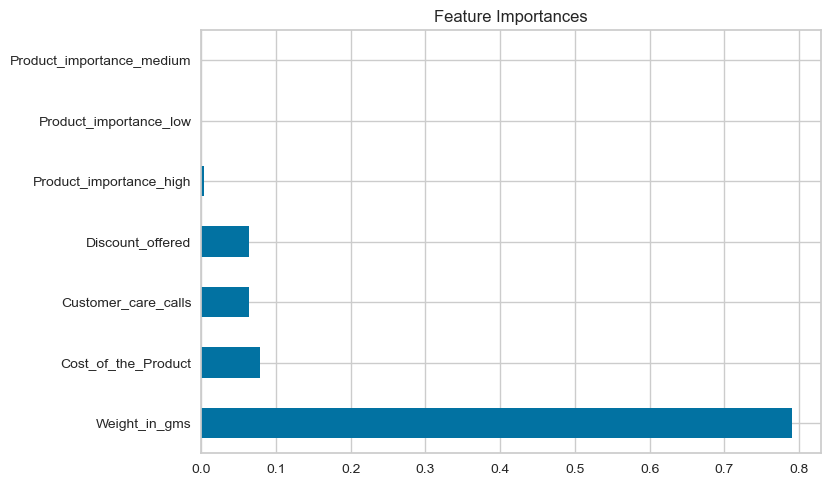

In [135]:
# Plotting the feature importance for Top 10 most important columns
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh', title = 'Feature Importances', grid=True);

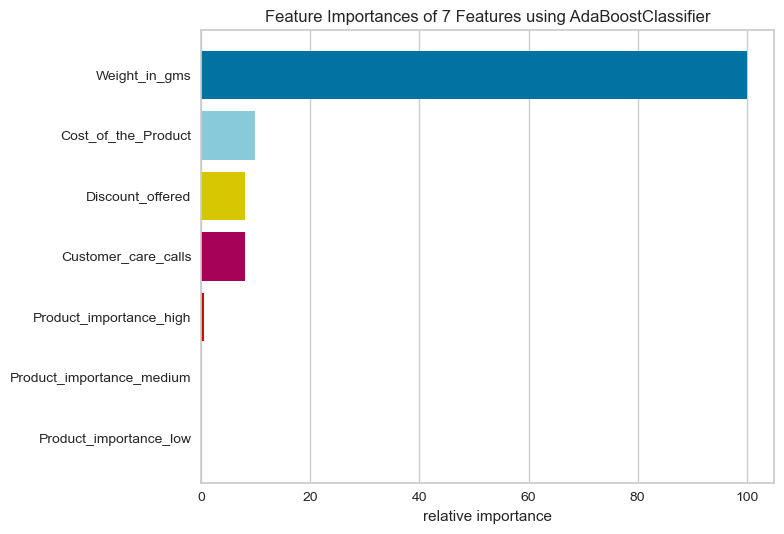

In [136]:
viz = FeatureImportances(clf, labels=X.columns)
viz.fit(X_train, y_train)
viz.show();

## Plot One Tree

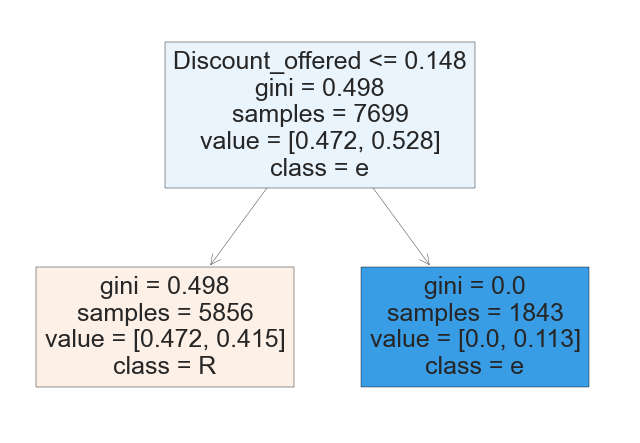

In [137]:
tree.plot_tree(clf.estimators_[5], filled=True,feature_names=Predictors, class_names=TargetVariable);

# KNN

In [57]:
# K-Nearest Neighbor(KNN)
clf = KNeighborsClassifier(n_neighbors=3)

# Printing all the parameters of KNN
print(clf)

KNeighborsClassifier(n_neighbors=3)


In [58]:
# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.55      0.58      0.56      1312
           1       0.71      0.68      0.70      1988

    accuracy                           0.64      3300
   macro avg       0.63      0.63      0.63      3300
weighted avg       0.65      0.64      0.64      3300



In [59]:
print('KNN Test Score:',KNN.score(X_test,y_test))

KNN Test Score: 0.6412121212121212


## Confusion Matrix

In [60]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[ 767  545]
 [ 639 1349]]


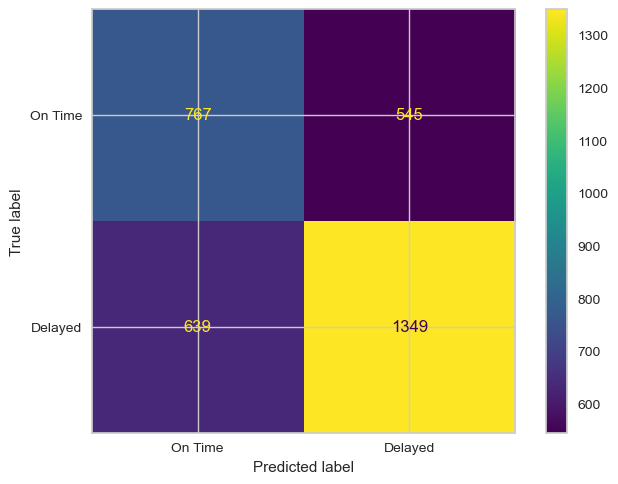

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesMapped)

disp.plot()
plt.show()

In [62]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.64


In [63]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.80897354 0.79836869 0.7662437  0.81185581 0.73834664 0.46486829
 0.45339789 0.47459224 0.45937976 0.47477593]

Final Average Accuracy of the model: 0.63


In [65]:
# 'KNeighborsClassifier' object has no attribute 'feature_importances_'

In [155]:
# YellowbrickTypeError: could not find feature importances param on KNeighborsClassifier

# SVM

In [88]:
# Support Vector Machines(SVM)
clf = svm.SVC(C=3, kernel='rbf', gamma=0.1)

# Printing all the parameters of KNN
print(clf)

SVC(C=3, gamma=0.1)


In [89]:
# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.55      0.81      0.65      1312
           1       0.81      0.56      0.66      1988

    accuracy                           0.66      3300
   macro avg       0.68      0.68      0.66      3300
weighted avg       0.71      0.66      0.66      3300



In [90]:
print('SVM Test Score:',SVM.score(X_test,y_test))

SVM Test Score: 0.6578787878787878


## Confusion Matrix

In [91]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[1058  254]
 [ 875 1113]]


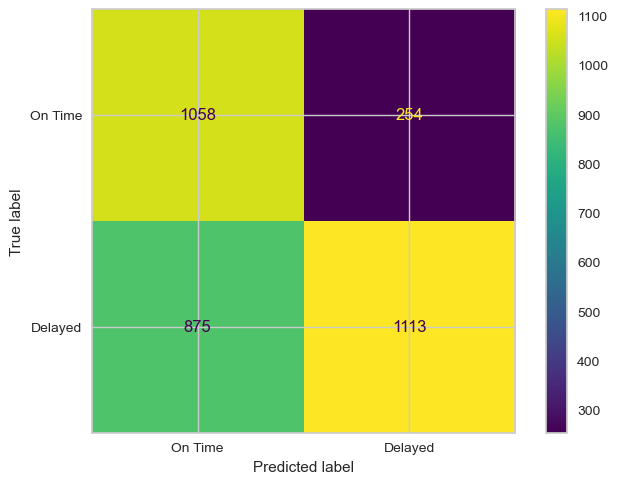

In [92]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesMapped)

disp.plot()
plt.show()

In [93]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.66


In [94]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.56791684 0.55792861 0.57348619 0.58050249 0.5578727  0.52474502
 0.4930022  0.48906969 0.49857143 0.50251531]

Final Average Accuracy of the model: 0.53


## Feature Importances

In [75]:
# 'SVC' object has no attribute 'feature_importances_'

In [166]:
# YellowbrickTypeError: could not find feature importances param on SVC

# Naive Bayes

In [261]:
# Naive Bayes
# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

GaussianNB()


In [262]:
NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
print(metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.53      0.97      0.69      1312
           1       0.96      0.44      0.60      1988

    accuracy                           0.65      3300
   macro avg       0.75      0.70      0.64      3300
weighted avg       0.79      0.65      0.63      3300



In [263]:
print('NB Test Score:',NB.score(X_test,y_test))

NB Test Score: 0.6487878787878788


## Confusion Matrix

In [177]:
cm = metrics.confusion_matrix(y_test, prediction)
print(cm)

[[1275   37]
 [1122  866]]


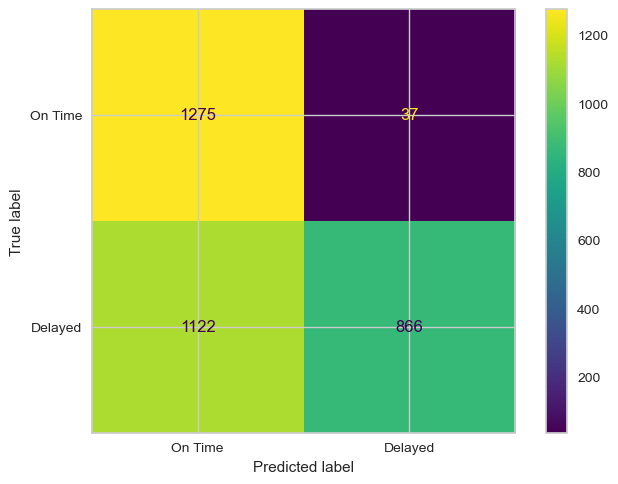

In [178]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classesMapped)

disp.plot()
plt.show()

In [179]:
# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

Accuracy of the model on Testing Sample Data: 0.63


In [180]:
# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [0.89164421 0.90891756 0.9008903  0.92151078 0.79338528 0.25398403
 0.24469145 0.27080794 0.26275287 0.2765327 ]

Final Average Accuracy of the model: 0.57


## Feature Importances

In [73]:
# 'GaussianNB' object has no attribute 'feature_importances_'

In [183]:
# YellowbrickTypeError: could not find feature importances param on GaussianNB

# Collect Model Data

In [267]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'AdaBoost',
         'KNN', 'SVM', 'Naive Bayes']

scores = [0.636969, 0.679696, 0.678484, 0.677575, 0.641212, 0.657878, 0.648787] 

# Alogorithim Comparison

In [268]:
modelComparison = pd.DataFrame()

modelComparison['Test Score'] = scores
modelComparison.index = models
modelComparison

Test Score
Logistic Regression    0.636969
Decision Tree          0.679696
Random Forest          0.678484
AdaBoost               0.677575
KNN                    0.641212
SVM                    0.657878
Naive Bayes            0.648787

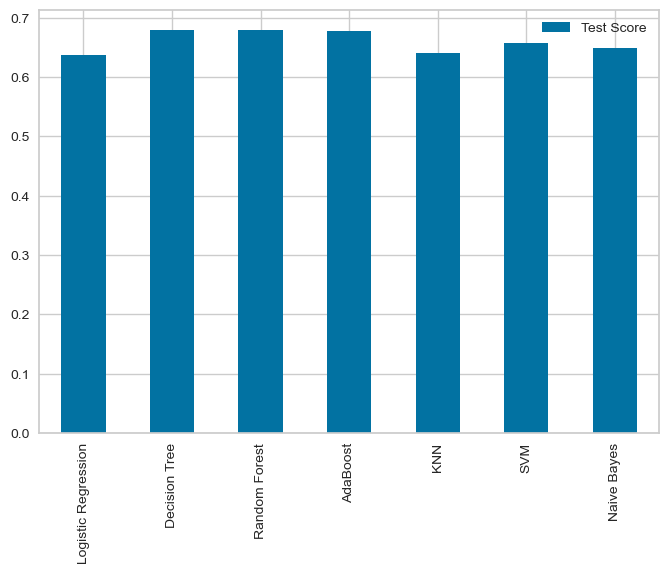

In [269]:
modelComparison.plot(kind='bar');

https://www.kaggle.com/datasets/prachi13/customer-analytics